In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import dataset

In [8]:
# read the dataset using pandas
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 900x500 with 0 Axes>

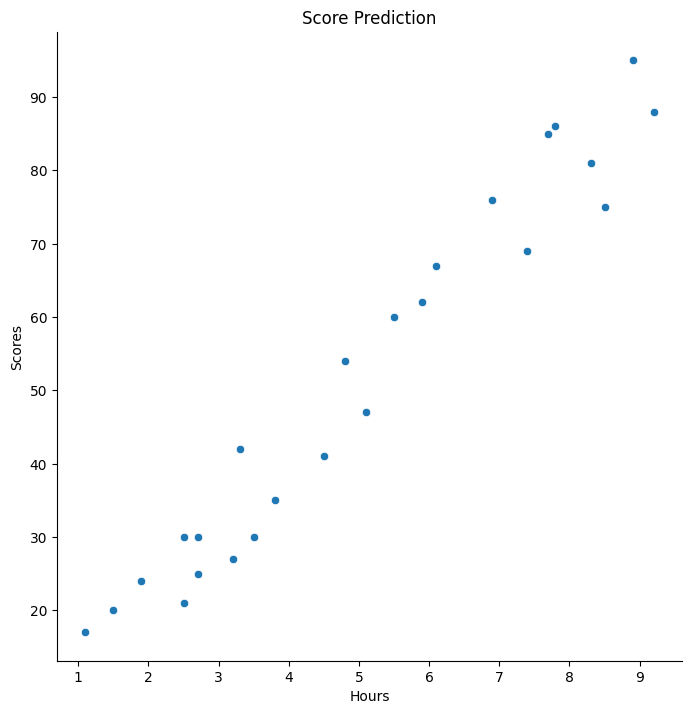

In [4]:
plt.figure(figsize=(9,5))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

In [5]:
df = data.copy()
print(df.shape)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print(df.shape)

(25, 2)
(25, 2)


In [27]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

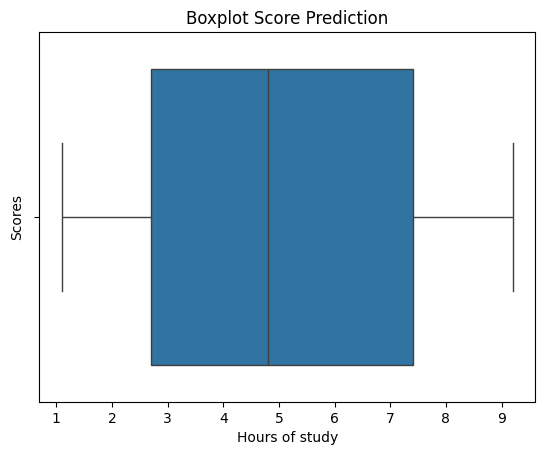

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

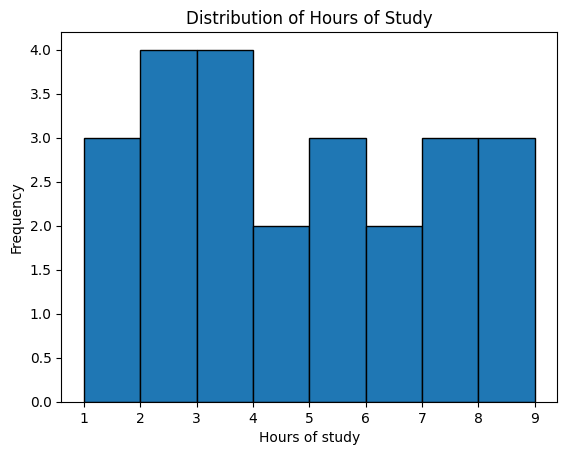

In [24]:
# Histogram untuk melihat distribusi jumlah jam belajar
plt.hist(df['Hours'], bins=range(1, 10), edgecolor='black')
plt.xlabel('Hours of study')
plt.ylabel('Frequency')
plt.title('Distribution of Hours of Study')
plt.xticks(range(1, 10))
plt.show()

In [25]:
correlation = df['Hours'].corr(df['Scores'])
print(f"Koefisien Korelasi antara Hours dan Scores: {correlation}")

Koefisien Korelasi antara Hours dan Scores: 0.9761906560220887


In [36]:
#Membagi data uji dan data latih
X = df[['Hours']]
y = df['Scores']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Modeling Linear Regression


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Inisialisasi model regresi linear
model_lr = LinearRegression()

# Latih model
model_lr.fit(X_train, y_train)

# Prediksi pada data uji
predictions_lr = model_lr.predict(X_test)

# Evaluasi model
mse_lr = mean_squared_error(y_test, predictions_lr)
print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)

intercept_lr = model_lr.intercept_
print("Intercept for Linear Regression:", intercept_lr)

coef_lr = model_lr.coef_
print("Coefficients for Linear Regression:", coef_lr)

r_squared_lr = model_lr.score(X_test, y_test)
print("R-Squared for Linear Regression:", r_squared_lr)

Mean Squared Error (MSE) for Linear Regression: 26.582796488881115
Intercept for Linear Regression: 2.695388922345728
Coefficients for Linear Regression: [9.60171878]
R-Squared for Linear Regression: 0.9605221627526418


# Modeling Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
model_rf.fit(X_train, y_train)

# Prediksi pada data uji
predictions_rf = model_rf.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, predictions_rf)
print("Mean Squared Error (MSE) for Random Forest:", mse_rf)
r_squared_rf = model_rf.score(X_test, y_test)
print("R-Squared for Random Forest:", r_squared_rf)

Mean Squared Error (MSE) for Random Forest: 43.03697569444442
R-Squared for Random Forest: 0.9360862307020844


# Plotting Aktual dan Prediksi Model

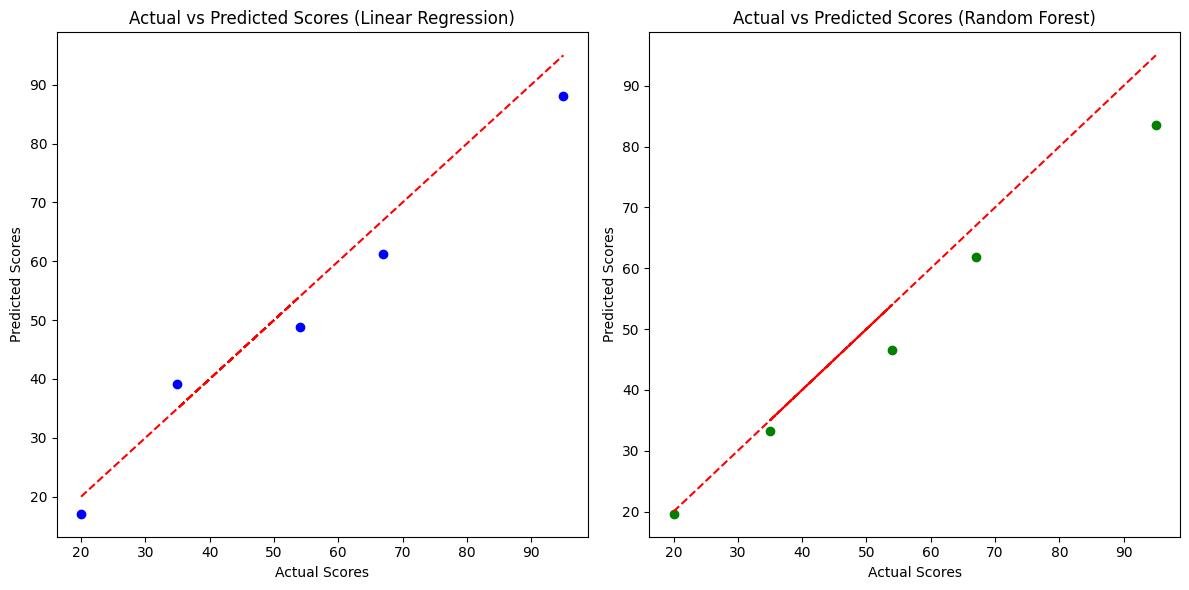

In [49]:
import matplotlib.pyplot as plt

# Buat subplot dengan satu baris dan dua kolom
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot untuk Model Regresi Linear
axes[0].scatter(y_test, predictions_lr, color='blue')
axes[0].plot(y_test, y_test, color='red', linestyle='--')
axes[0].set_xlabel('Actual Scores')
axes[0].set_ylabel('Predicted Scores')
axes[0].set_title('Actual vs Predicted Scores (Linear Regression)')

# Plot untuk Model Random Forest
axes[1].scatter(y_test, predictions_rf, color='green')
axes[1].plot(y_test, y_test, color='red', linestyle='--')
axes[1].set_xlabel('Actual Scores')
axes[1].set_ylabel('Predicted Scores')
axes[1].set_title('Actual vs Predicted Scores (Random Forest)')

# Tampilkan plot
plt.tight_layout()
plt.show()

# Membandingkan R-Score Model

In [50]:
print("R-Squared Linear Regression:", r_squared_lr)
print("R-Squared Random Forest:", r_squared_rf)

R-Squared Linear Regression: 0.9605221627526418
R-Squared Random Forest: 0.9360862307020844


Kesimpulannya, **nilai R-Squared untuk Linear Regression sedikit lebih tinggi dibandingkan dengan Random Forest**. Ini menunjukkan bahwa model Linear Regression memiliki kemampuan yang sedikit lebih baik dalam memprediksi skor siswa dengan melihat jam belajar dalam data yang ada diatas daripada model Random Forest.